In [2]:
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit

In [3]:
plt.rcParams['figure.figsize'] = [8.0, 4.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [5]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)
    
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [6]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

# No RF No SC Dispersion Matching

In [14]:
# Create dd dictionary
dd1 = dict()

dd1 = add_input_file(dd1, '01_Lattice_NoSC_NoRF/output/output.mat', 'Lat NoSC NoRF')
dd1 = add_input_file(dd1, '02_Operational_NoSC_NoRF/output/output.mat', 'Op NoSC NoRF')
dd1 = add_input_file(dd1, '03_Rematched_NoSC_NoRF/output/output.mat', 'ReM NoSC NoRF')

sc = 'NoSC'
legend_label = 'Case'

main_label = 'NoRF'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 30
zoom_turns = 15
betagamma = 2.492104532 * 0.9159915293879255

	Added output data from  01_Lattice_NoSC_NoRF/output/output.mat 	 dictionary key:  Lat NoSC NoRF
	Added output data from  02_Operational_NoSC_NoRF/output/output.mat 	 dictionary key:  Op NoSC NoRF
	Added output data from  03_Rematched_NoSC_NoRF/output/output.mat 	 dictionary key:  ReM NoSC NoRF


In [15]:
len(dd1['Lat NoSC NoRF']['D_x'][0])

31

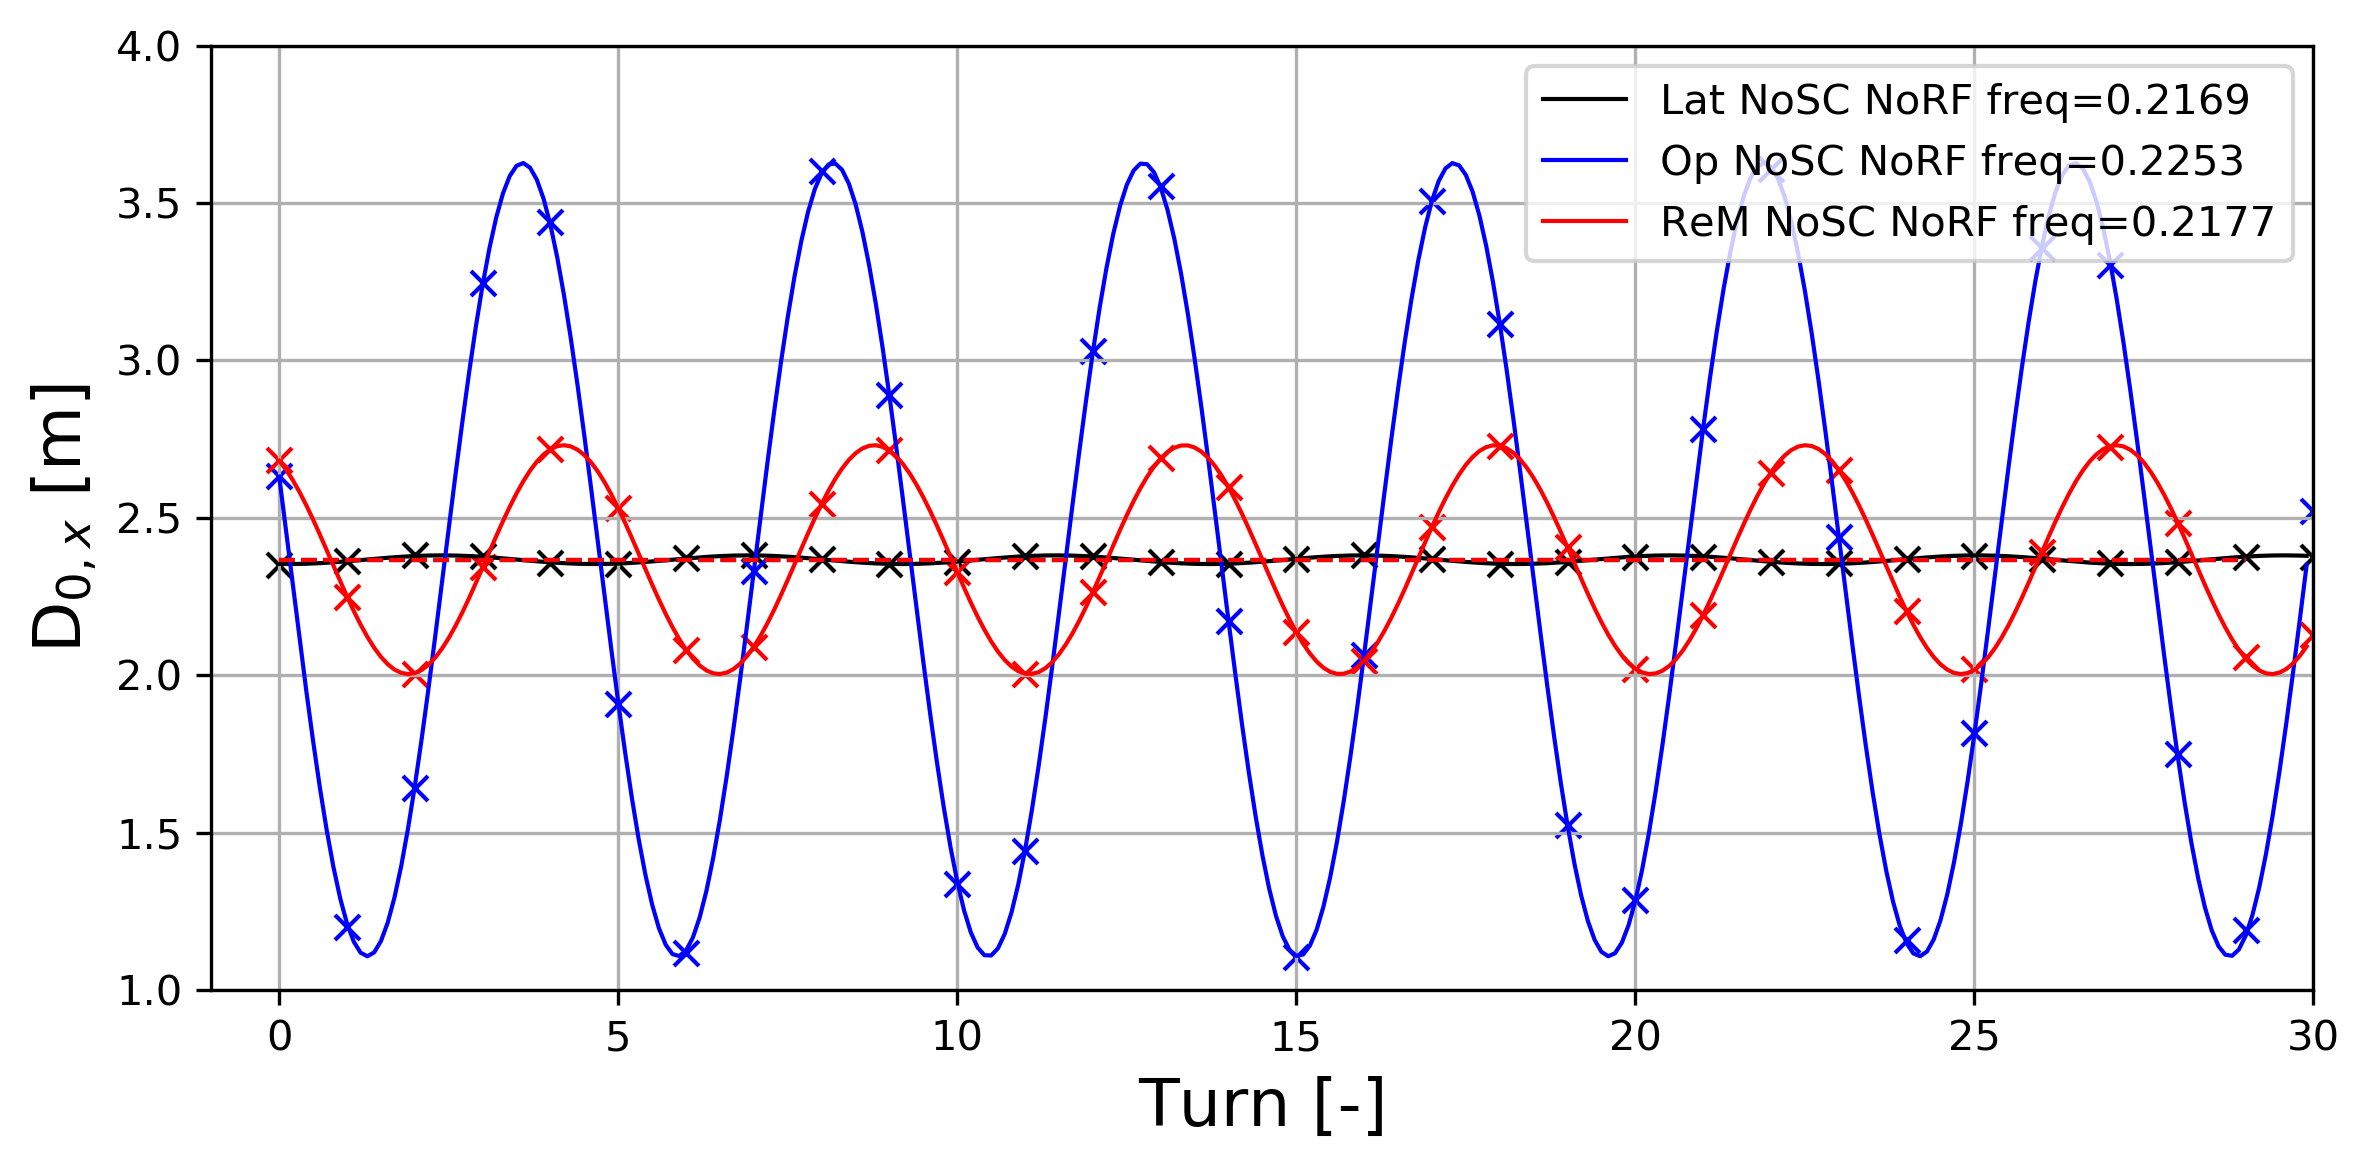

In [16]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

turns_fine = np.arange(0, 30, 0.1)

y_Lat = (dd1['Lat NoSC NoRF']['D_x'][0]-np.mean(dd1['Lat NoSC NoRF']['D_x'][0]))
freq_Lat = pnf.naff(y_Lat, turns=30, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Lat = 'Lat NoSC NoRF freq=' + str(round_sig(freq_Lat))

y_Op = (dd1['Op NoSC NoRF']['D_x'][0]-np.mean(dd1['Op NoSC NoRF']['D_x'][0]))
freq_Op = pnf.naff(y_Op, turns=30, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Op = 'Op NoSC NoRF freq=' + str(round_sig(freq_Op))

y_ReM = (dd1['ReM NoSC NoRF']['D_x'][0]-np.mean(dd1['ReM NoSC NoRF']['D_x'][0]))
freq_ReM = pnf.naff(y_ReM, turns=30, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_ReM = 'ReM NoSC NoRF freq=' + str(round_sig(freq_ReM))

popt_Lat, pcov_Lat = curve_fit(Md_fit, dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0], marker = 'x', color = 'k')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3]),'k',label = lab_Lat)
plt.plot([dd1['Lat NoSC NoRF']['turn'][0][0]+1, dd1['Lat NoSC NoRF']['turn'][0][-1]], [popt_Lat[0],popt_Lat[0]],'--k')

popt_Op, pcov_Op = curve_fit(Md_fit, dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0], marker = 'x', color = 'b')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Op[0], popt_Op[1], popt_Op[2], popt_Op[3]),'b',label = lab_Op)
plt.plot([dd1['Op NoSC NoRF']['turn'][0][0]+1, dd1['Op NoSC NoRF']['turn'][0][-1]], [popt_Op[0],popt_Op[0]],'--b')

popt_ReM, pcov_ReM = curve_fit(Md_fit, dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0], marker = 'x', color = 'r')
plt.plot(turns_fine, Md_fit(turns_fine, popt_ReM[0], popt_ReM[1], popt_ReM[2], popt_ReM[3]),'r',label = lab_ReM)
plt.plot([dd1['ReM NoSC NoRF']['turn'][0][0]+1, dd1['ReM NoSC NoRF']['turn'][0][-1]], [popt_ReM[0],popt_ReM[0]],'--r')


plt.xlabel('Turn [-]')
plt.ylabel(r'D$_{0,x}$ [m]')
#plt.title('PI.BSG52')
plt.xlim((-1, 30))
plt.ylim((1, 4))
plt.grid()
plt.legend(loc = 1, prop=dict(size=10))

ax1 = plt.gca()
#ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax1.xaxis.label.set_fontsize(16)
ax1.yaxis.label.set_fontsize(16)

plt.tight_layout()

plt.savefig('Dx_NoSC_NoRF_Oscillation.png', dpi = 600)

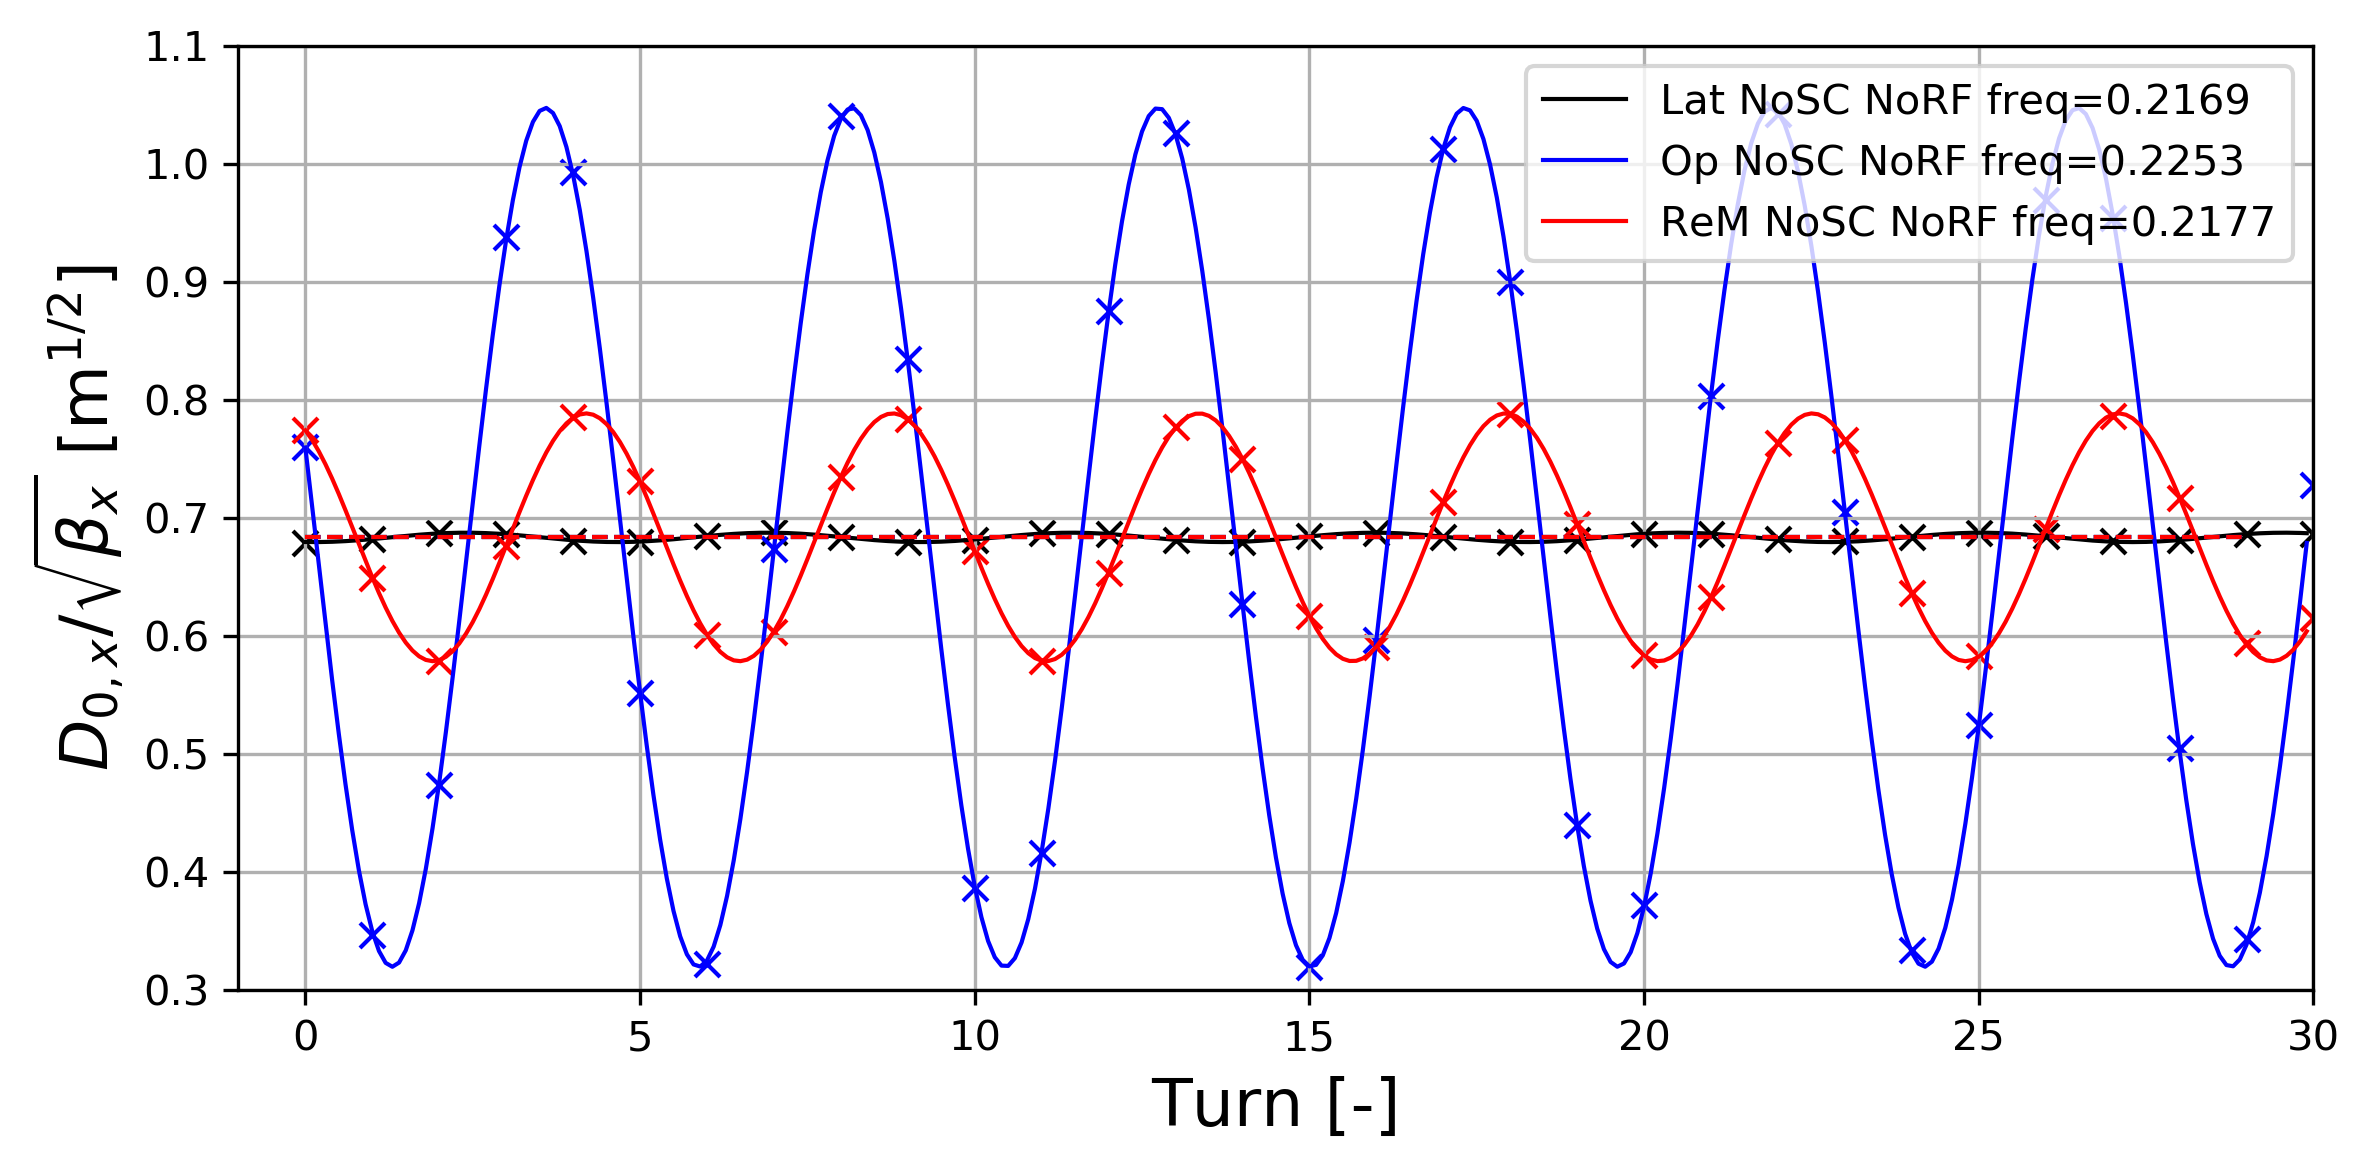

In [28]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

turns_fine = np.arange(0, 30, 0.1)

# From NoSC simulations of full bunch

bet_x_Lat = np.sqrt(11.995284408280922)
bet_x_Op = np.sqrt(11.995525965851687)
bet_x_ReM = np.sqrt(11.99483343844433)

mean_D_x_Lat = np.mean(dd1['Lat NoSC NoRF']['D_x'][0]/bet_x_Lat)
mean_D_x_Op = np.mean(dd1['Op NoSC NoRF']['D_x'][0]/bet_x_Op)
mean_D_x_ReM = np.mean(dd1['ReM NoSC NoRF']['D_x'][0]/bet_x_ReM)

#print dd1['Lat NoSC NoRF']['beta_x'][0]
y_Lat = (dd1['Lat NoSC NoRF']['D_x'][0]/bet_x_Lat-mean_D_x_Lat)
freq_Lat = pnf.naff(y_Lat, turns=30, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Lat = 'Lat NoSC NoRF freq=' + str(round_sig(freq_Lat))

y_Op = (dd1['Op NoSC NoRF']['D_x'][0]/bet_x_Op-mean_D_x_Op)
freq_Op = pnf.naff(y_Op, turns=30, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Op = 'Op NoSC NoRF freq=' + str(round_sig(freq_Op))

y_ReM = (dd1['ReM NoSC NoRF']['D_x'][0]/bet_x_ReM-mean_D_x_ReM)
freq_ReM = pnf.naff(y_ReM, turns=30, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_ReM = 'ReM NoSC NoRF freq=' + str(round_sig(freq_ReM))

popt_Lat, pcov_Lat = curve_fit(Md_fit, dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0]/bet_x_Lat, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0]/bet_x_Lat, marker = 'x', color = 'k')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3]),'k',label = lab_Lat)
plt.plot([dd1['Lat NoSC NoRF']['turn'][0][0]+1, dd1['Lat NoSC NoRF']['turn'][0][-1]], [popt_Lat[0],popt_Lat[0]],'--k')

popt_Op, pcov_Op = curve_fit(Md_fit, dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0]/bet_x_Op, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0]/bet_x_Op, marker = 'x', color = 'b')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Op[0], popt_Op[1], popt_Op[2], popt_Op[3]),'b',label = lab_Op)
plt.plot([dd1['Op NoSC NoRF']['turn'][0][0]+1, dd1['Op NoSC NoRF']['turn'][0][-1]], [popt_Op[0],popt_Op[0]],'--b')

popt_ReM, pcov_ReM = curve_fit(Md_fit, dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0]/bet_x_ReM, method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0]/bet_x_ReM, marker = 'x', color = 'r')
plt.plot(turns_fine, Md_fit(turns_fine, popt_ReM[0], popt_ReM[1], popt_ReM[2], popt_ReM[3]),'r',label = lab_ReM)
plt.plot([dd1['ReM NoSC NoRF']['turn'][0][0]+1, dd1['ReM NoSC NoRF']['turn'][0][-1]], [popt_ReM[0],popt_ReM[0]],'--r')


plt.xlabel('Turn [-]')
plt.ylabel(r'$D_{0,x}/\sqrt{\beta_{x}}$ [m$^{1/2}$]')
#plt.title('PI.BSG52')
plt.xlim((-1, 30))
plt.ylim((0.3, 1.1))
plt.grid()
plt.legend(loc = 1, prop=dict(size=10))

ax1 = plt.gca()
#ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax1.xaxis.label.set_fontsize(16)
ax1.yaxis.label.set_fontsize(16)

plt.tight_layout()

plt.savefig('Dx_NoSC_NoRF_Oscillation_normalised.png', dpi = 600)

12.875468501760404


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in divide


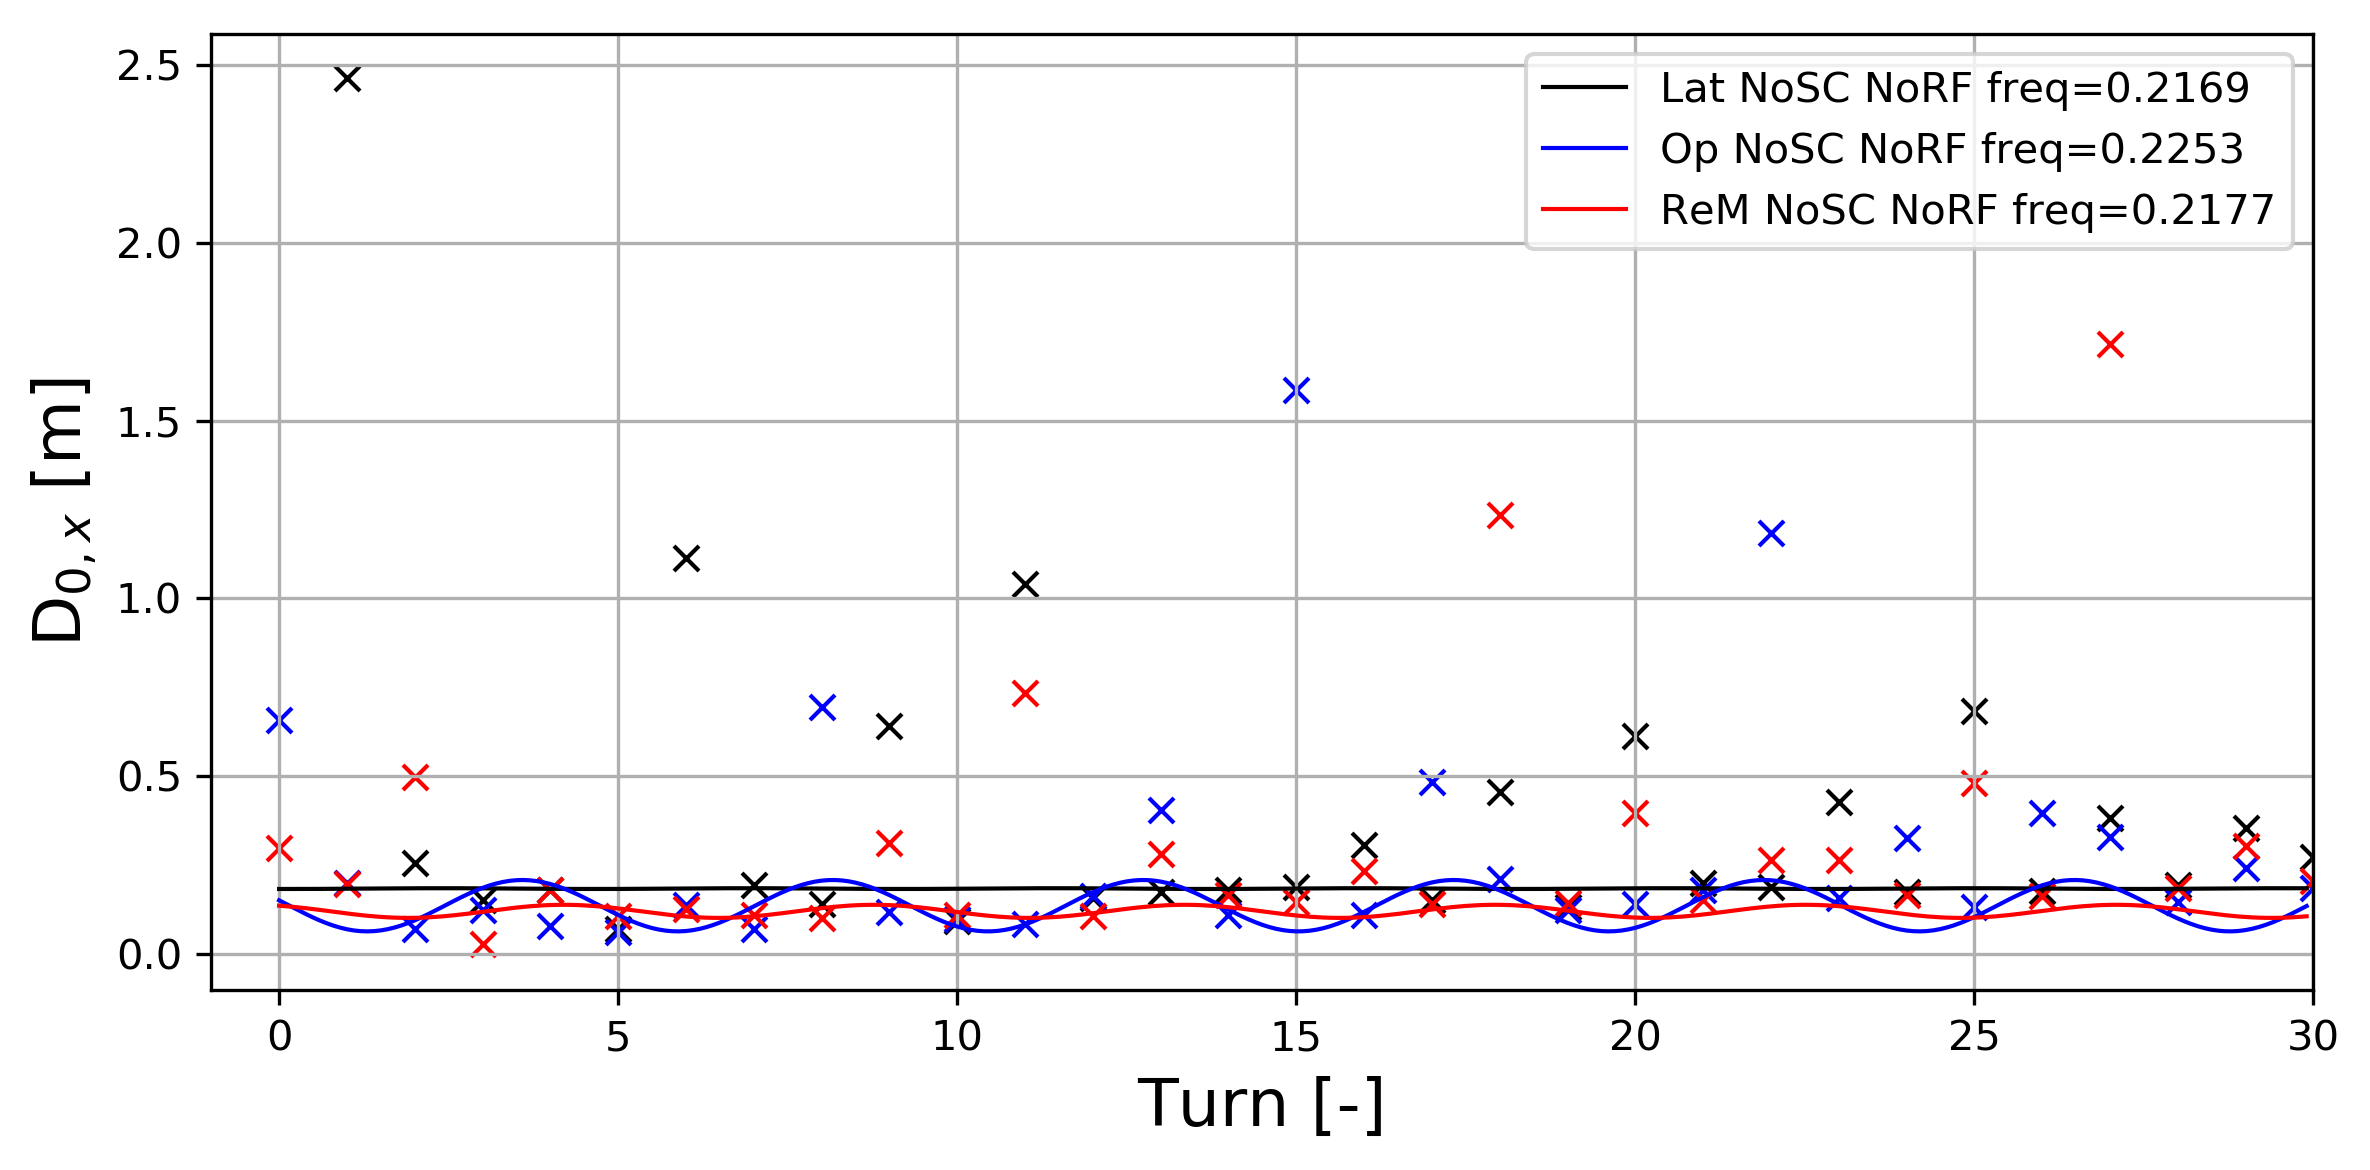

In [17]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 30

turns_fine = np.arange(0, trns, 0.1)

y_Lat = (dd1['Lat NoSC NoRF']['D_x'][0]-np.mean(dd1['Lat NoSC NoRF']['D_x'][0]))
freq_Lat = pnf.naff(y_Lat, turns=trns, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Lat = 'Lat NoSC NoRF freq=' + str(round_sig(freq_Lat))

y_Op = (dd1['Op NoSC NoRF']['D_x'][0]-np.mean(dd1['Op NoSC NoRF']['D_x'][0]))
freq_Op = pnf.naff(y_Op, turns=trns, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Op = 'Op NoSC NoRF freq=' + str(round_sig(freq_Op))

y_ReM = (dd1['ReM NoSC NoRF']['D_x'][0]-np.mean(dd1['ReM NoSC NoRF']['D_x'][0]))
freq_ReM = pnf.naff(y_ReM, turns=trns, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_ReM = 'ReM NoSC NoRF freq=' + str(round_sig(freq_ReM))

bet_Lat = np.sqrt(np.mean(dd1['Lat NoSC NoRF']['beta_x'][0]))
print bet_Lat

popt_Lat, pcov_Lat = curve_fit(Md_fit, dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0]/np.sqrt(dd1['Lat NoSC NoRF']['beta_x'][0]), marker = 'x', color = 'k')
#plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3])/np.sqrt(np.mean(dd1['Lat NoSC NoRF']['beta_x'][0])))),'k',label = lab_Lat)
plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3])/bet_Lat,'k',label = lab_Lat)
#plt.plot([dd1['Lat NoSC NoRF']['turn'][0][0]+1, dd1['Lat NoSC NoRF']['turn'][0][-1]], [popt_Lat[0],popt_Lat[0]],'--k')

popt_Op, pcov_Op = curve_fit(Md_fit, dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0]/np.sqrt(dd1['Op NoSC NoRF']['beta_x'][0]), marker = 'x', color = 'b')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Op[0], popt_Op[1], popt_Op[2], popt_Op[3])/np.sqrt(np.mean(dd1['Op NoSC NoRF']['beta_x'][0])),'b',label = lab_Op)
#plt.plot([dd1['Op NoSC NoRF']['turn'][0][0]+1, dd1['Op NoSC NoRF']['turn'][0][-1]], [popt_Op[0],popt_Op[0]],'--b')

popt_ReM, pcov_ReM = curve_fit(Md_fit, dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0]/np.sqrt(dd1['ReM NoSC NoRF']['beta_x'][0]), marker = 'x', color = 'r')
plt.plot(turns_fine, Md_fit(turns_fine, popt_ReM[0], popt_ReM[1], popt_ReM[2], popt_ReM[3])/np.sqrt(np.mean(dd1['ReM NoSC NoRF']['beta_x'][0])),'r',label = lab_ReM)
#plt.plot([dd1['ReM NoSC NoRF']['turn'][0][0]+1, dd1['ReM NoSC NoRF']['turn'][0][-1]], [popt_ReM[0],popt_ReM[0]],'--r')


plt.xlabel('Turn [-]')
plt.ylabel(r'D$_{0,x}$ [m]')
#plt.title('PI.BSG52')
plt.xlim((-1, 30))
#plt.ylim((1, 4))
plt.grid()
plt.legend(loc = 1, prop=dict(size=10))

ax1 = plt.gca()
#ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax1.xaxis.label.set_fontsize(16)
ax1.yaxis.label.set_fontsize(16)

plt.tight_layout()

#plt.savefig('Dx_NoSC_NoRF_Oscillation.png', dpi = 600) 